# Imporation des packages

In [15]:
# Import des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

In [16]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [17]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [18]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Charger les données du diabète
diabetes = load_diabetes()

# Créer un DataFrame à partir des données
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Ajouter la colonne cible ('target') au DataFrame
data['target'] = diabetes.target

# Afficher les premières lignes du DataFrame
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [20]:
# Desciption de la base de données
data.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


# Identification graphique des outliers

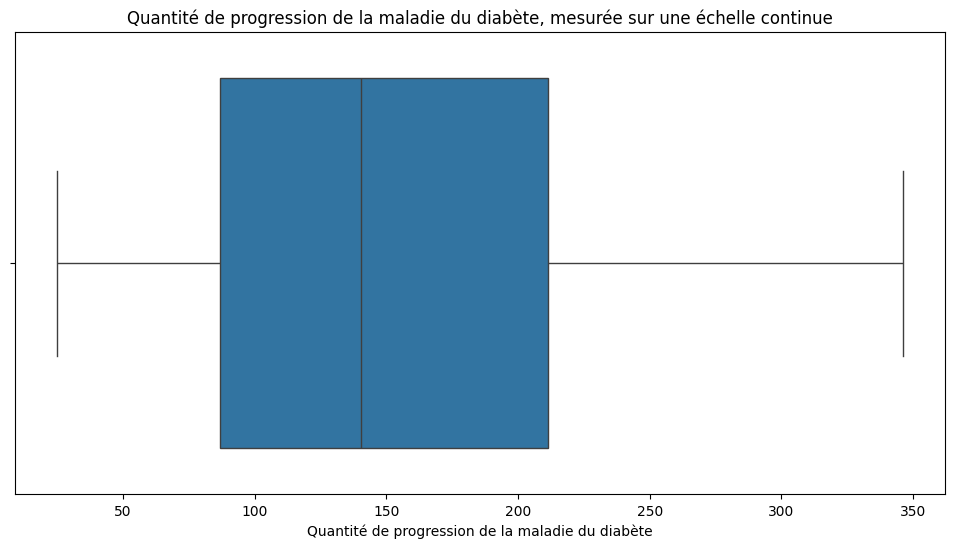

In [21]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='target')
plt.xlabel('Quantité de progression de la maladie du diabète')
plt.title("Quantité de progression de la maladie du diabète, mesurée sur une échelle continue")
plt.show()

# Identification des outliers univariées

## Identification des outliers IQR

La méthode de l'IQR est une approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart interquartile pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Avantages

La méthode de l'IQR est relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la médiane et l'écart interquartile pour calculer les bornes plausibles.

### Inconvénients

La méthode de l'IQR peut ne pas fonctionner correctement dans certaines distributions non symétriques, car elle suppose une distribution normale ou presque normale des données. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.


In [22]:
# Identification des données aberrantes - IQR
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(data, 'target')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)

Outliers détectés:
Empty DataFrame
Columns: [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target]
Index: []


## Identification des outliers avec Z-score

## Méthode du z-score

La méthode du z-score est une autre approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart à la moyenne pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

Le z-score est défini comme la différence entre une observation et la moyenne de la distribution des données, divisée par l'écart-type de la distribution :

z = (x - μ) / σ

Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : μ - 2.5 x σ
- Limite supérieure : μ + 2.5 x σ

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode du z-score est également relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la moyenne et l'écart-type pour calculer les bornes plausibles.

### Inconvénients

Comme pour la méthode de l'IQR, la méthode du z-score peut ne pas fonctionner correctement dans certaines distributions non symétriques. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.

In [23]:

# Identification des données aberrantes - Z-score
# Fonction pour détecter les outliers en utilisant le z-score
def detect_outliers_zscore(data, column, threshold=2.5):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    return data[np.abs(z_scores) > threshold]

# Trouver les outliers pour la colonne 'target'
outliers = detect_outliers_zscore(data, 'target')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)


Outliers détectés:
          age       sex       bmi        bp        s1       s2        s3  \
256 -0.049105 -0.044642  0.160855 -0.046985 -0.029088 -0.01979 -0.047082   

           s4       s5        s6  target  
256  0.034309  0.02802  0.011349   346.0  


# Identification des outliers avec des approches multivariées

## Analyse graphique

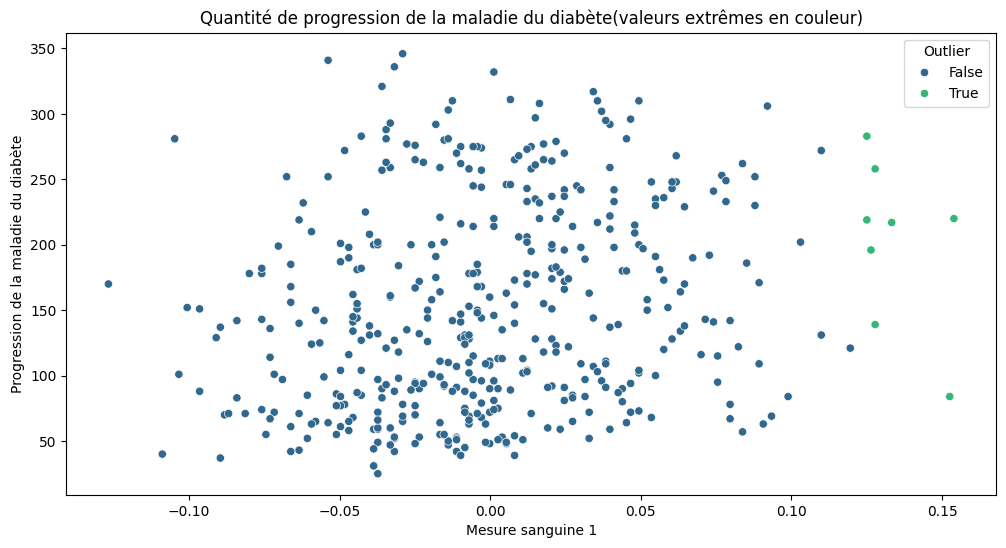

In [24]:

# Détecter les outliers pour les colonnes 'S1' et 'target'
outliers_s1 = detect_outliers_iqr(data, 's1')
outliers_target = detect_outliers_iqr(data, 'target')

# Ajouter une colonne pour indiquer si la valeur est extrême
data['Outlier'] = False
data.loc[outliers_s1.index, 'Outlier'] = True
data.loc[outliers_target.index, 'Outlier'] = True

# Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='s1', y='target', hue='Outlier', palette='viridis')
plt.xlabel('Mesure sanguine 1')
plt.ylabel('Progression de la maladie du diabète')
plt.title("Quantité de progression de la maladie du diabète(valeurs extrêmes en couleur)")
plt.show()

## Isolation Forest



L'Isolation Forest est une méthode d'apprentissage automatique non supervisée pour identifier les valeurs aberrantes dans des données univariées et multivariées. **Elle fonctionne en construisant plusieurs arbres de décision aléatoires** et en calculant un score d'anomalie pour chaque observation en fonction de la profondeur moyenne à laquelle elle est isolée des autres observations.

### Avantages

**L'Isolation Forest est capable de détecter les valeurs aberrantes dans des données univariées et multivariées**. Elle fonctionne également bien avec des **distributions non symétriques** et est assez robuste aux valeurs aberrantes.


### Inconvénients

L'Isolation Forest peut être sensible aux paramètres tels que le nombre d'arbres et la taille des sous-échantillons. De plus, elle peut parfois être difficile à interpréter, en particulier pour les données multivariées.


In [25]:
from sklearn.ensemble import IsolationForest

# Appliquer l'Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(data)

# Ajouter les labels d'anomalie au DataFrame
data['Outlier'] = outlier_labels

# Afficher les outliers
outliers = data[data['Outlier'] == -1]
print("Outliers détectés:")
print(outliers)

Outliers détectés:
          age       sex       bmi        bp        s1        s2        s3  \
7    0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
15  -0.052738  0.050680 -0.018062  0.080401  0.089244  0.107662 -0.039719   
23   0.045341  0.050680  0.060618  0.031065  0.028702 -0.047347 -0.054446   
26  -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
29   0.067136  0.050680 -0.006206  0.063187 -0.042848 -0.095885  0.052322   
32   0.034443  0.050680  0.125287  0.028758 -0.053855 -0.012900 -0.102307   
41  -0.099961 -0.044642 -0.067641 -0.108956 -0.074494 -0.072712  0.015505   
43   0.019913 -0.044642 -0.023451 -0.071085  0.020446 -0.010082  0.118591   
57  -0.027310 -0.044642 -0.063330 -0.050427 -0.089630 -0.104340  0.052322   
58   0.041708 -0.044642 -0.064408  0.035644  0.012191 -0.057994  0.181179   
76  -0.030942  0.050680  0.028284  0.070072 -0.126781 -0.

In [25]:
data.to_excel('diabetes.xlsx', index=False)